![](https://s3-sa-east-1.amazonaws.com/prod-jobsite-files.kenoby.com/uploads/portocred-1535567762-logo344x147-01png.png)

# Desafio:

A partir dos 3 DataFrames abaixo referentes a valorização e desvalorização de um conjunto de ativos financeiros:

* Calcular o preço da carteira
* Representar graficamente o comportamento dos ativos
* Montar uma estratégia de compra e venda que:
    1. Identifique os momentos ideais de venda
    1. Identifique os momentos ideais de compra
* A partir da estratégia de compra e venda, representar graficamente o comportamento da carteira


# Imports

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = '{:.5f}'.format


# Dados

In [250]:
portfolio = pd.read_csv('AtivoCarteira.csv')
portfolio

,ativos,qtd
0,A,15
1,C,38
2,E,101


In [81]:
asset_prices = pd.read_csv('AtivoPrecoUnidade2017-04-05.csv')
asset_prices

,ativo,preco_unidade
0,A,14
1,B,32
2,C,12
3,D,13
4,E,31


In [82]:
asset_pricing = pd.read_csv('AtivoValorizacaoDiaria.csv', index_col='DATA')
asset_pricing.head()

,A,B,C,D,E
DATA,,,,,
2017-04-05,0.00281,-0.01801,0.03206,0.03082,0.04895
2017-04-06,0.03702,0.04134,0.01548,0.04894,-0.03068
2017-04-07,-0.01076,-0.04716,0.02380,0.00228,-0.04953
2017-04-08,-0.03018,0.03530,-0.02811,0.04107,0.00472
2017-04-09,-0.03152,0.02479,-0.04673,-0.00490,0.04261


# Pré-análise

In [91]:
# Aplica +1 em cada célula para facilitar o cálculo posterior
asset_pricing_values = asset_pricing.apply(lambda x: x+1)

# Adiciona linha com valores inicias
initial_price = pd.DataFrame({'A':14, 'B':32, 'C':12, 'D':13, 'E':31}, index = ['2017-04-04']) 
asset_pricing_values = pd.concat([initial_price, asset_pricing_values])

# Cria o valor ao longo do tempo baseado na variação
asset_pricing_values = asset_pricing_values.cumprod()

asset_pricing_values.head()

,A,B,C,D,E
2017-04-04,14.00000,32.00000,12.00000,13.00000,31.00000
2017-04-05,14.03936,31.42360,12.38470,13.40069,32.51749
2017-04-06,14.55913,32.72267,12.57645,14.05657,31.51969
2017-04-07,14.40243,31.17948,12.87583,14.08866,29.95848
2017-04-08,13.96776,32.28027,12.51389,14.66722,30.09996


In [139]:
# Função de criação de gráficos

def gera_grafico(data, title, xlabel, ylabel):
    """
      Gera um gráfico de linha
      Argumentos:
        data: o conjunto dos dados
        title: título do gráfico
        xlabel: legenda do eixo x
        ylabel: legenda do eixo y
      Retorna:
        Uma imagem do gráfico gerado.
    """

    plt.figure(figsize=(15,5))
    plt.plot(data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Análise

## Preço da carteira

In [251]:
# Cria um dataframe com o último valor do ativo
last_pricing = asset_pricing_values.tail(1).transpose()
last_pricing.reset_index(level = 0, inplace = True)
last_pricing.rename(columns = {'index': 'ativos'}, inplace = True)

last_pricing

,ativos,2019-12-30
0,A,36.02470
1,B,8.02578
2,C,5.46167
3,D,7.43517
4,E,26.74920


In [252]:
# Junta o dataframe do portfólio com o último valor do ativo
portfolio = last_pricing.merge(portfolio, on = 'ativos', how = 'right')

# Cria a coluna de valor no produto
portfolio['valor_carteira'] = portfolio.iloc[:,1]*portfolio['qtd']

portfolio

,ativos,2019-12-30,qtd,valor_carteira
0,A,36.02470,15,540.37055
1,C,5.46167,38,207.54339
2,E,26.74920,101,2701.66922


In [253]:
portfolio.valor_carteira.sum()

3449.5831622868063

## Ativo A

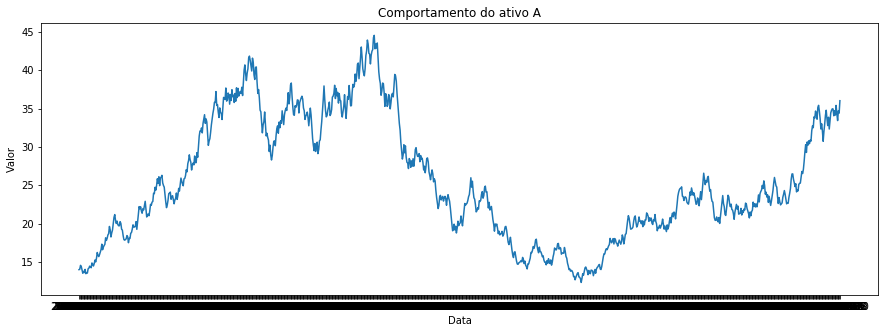

In [141]:
gera_grafico(asset_pricing_values['A'], 'Comportamento do ativo A', 'Data', 'Valor')

## Ativo B

In [ ]:
gera_grafico(asset_pricing_values['B'], 'Comportamento do ativo B', 'Data', 'Valor')

## Ativo C

In [ ]:
gera_grafico(asset_pricing_values['C'], 'Comportamento do ativo C', 'Data', 'Valor')

## Ativo D

In [ ]:
gera_grafico(asset_pricing_values['D'], 'Comportamento do ativo D', 'Data', 'Valor')

## Ativo E

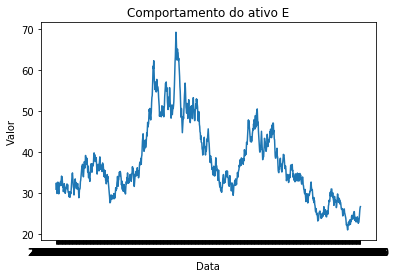

In [107]:
gera_grafico(asset_pricing_values['E'], 'Comportamento do ativo E', 'Data', 'Valor')